# Escalamiento de datos numéricos

### Transformaciones lineales

In [ ]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

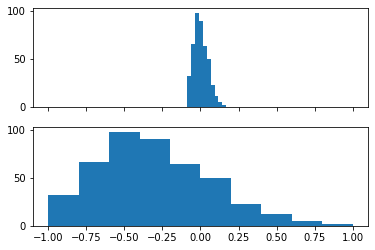

In [ ]:
# Reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

# Se crea una subplots que tiene 2x1 graficos que comparte
# los mismos ejes
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(raw)
axs[1].hist(scaled)

Se puede observar que se realizo el escalamiento, sin embargo no se muestra una distribución normal o simetrica, sin embargo, para el estudio particular de este caso, se asume que ya tiene un transformación adecuada

In [ ]:
# Modelos para entrenamiento

# Función para entrenar el modelo con los datos sin esccalar
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

# Función para entrenar el modelo con los datos escalados
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.0987601460001315
train scaled: 0.06262046499978169


Con esta medición del tiempo, se puede observar que al escalar
los datos entre -1 y 1, los tiempos para entrenar el modelo se reducen de 0.09 a 0.06, lo que demuestra que es muy buena practica escalar los datos antes de entrenar el modelo.

* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

### Reto: crea el escalamiento pero con un z-score

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

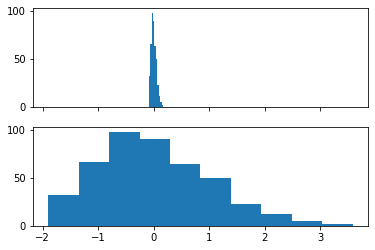

In [ ]:
niu = np.average(raw)
sigma = np.std(raw)

scaled_z = (raw - niu)/sigma
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(raw)
axs[1].hist(scaled_z)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

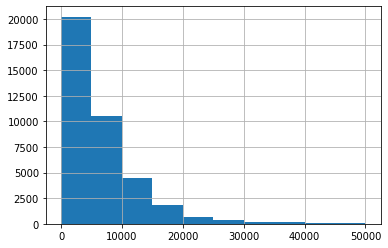

In [ ]:
df.price_usd.hist()

La base de datos cars, en su variable price_usd, se observar un distribución fuertemente sesgada, por lo que debe aplicarse transformaciones no lineales.

Transformación con $$tanh(x)$$

<AxesSubplot:>

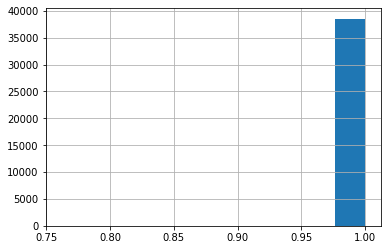

In [ ]:
# El metodo apply, coge la columna, la transforma y la 
# sobreescribe sobre la misma columna
df.price_usd.apply(lambda x: np.tanh(x)).hist()

Se puede observar que la transformación colapso, por lo que se debe ajustar el valor dentro de la tangente hiperbolica

<AxesSubplot:>

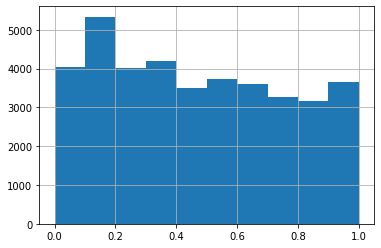

In [ ]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33eb33f6-cb2f-4a3f-9053-8139aa2a3101' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>